# 1. Introduction
## 1.1 Background and Problem Statement
Senior officials from a democratically elected government approached the company. Their country ('Country23' for the sake of discretion) and the region as whole had experienced many years of political and economic instability. After recent elections, parliament signaled the willingness to make major changes to governmental and economic policies that would transform the country with the intent of influencing positive changes throughout the region. They asked us to provide insights into where they would benefit most in investment of their time and money. There was agreement that the initial study’s scope would be factors that influence GDP (Gross Domestic Product) per capita and poverty. Currently Country23 sits in the lower third of all nations for both measures

### 1.2 Project Goal
To provide insights into the most critical factors that influence Gross Domestic Product, and % of people at the poverty line.

# 2. Data Comprehension
### 2.1 Data Collection
The initial two repositories that were examined were the [World Bank](https://databank.worldbank.org/home.aspx) and [United Nations](https://data.un.org) datamarts. After a thorough review it was recognized the most complete set of records could be collected exclusively from using the united nations data repository. Several economic and policy related databases were found that the team felt could give insights congruent to the requirements of the client. Below is the list of variable's names, their unit of measure, defintion, and dataframe name that will be read into the notebook for exploration and manipulation.

#### Target Variables - Also known as outcome/dependant variable is the variable that needs to be explained or predicted in a study or model
1. **Gross Domestic Product per capita (df_gdp)**_*[$US/Capita]* - Monetary value of all of the goods and services produced within a contries borders - seen as a key indicator of economic health
3. **Poverty Score (df_cpi)**_*[%Population]* - The percentage of the countries population that is at or below the poverty line

#### Features Variables - Also known as input/independant variables are properties/characteristics of a process or system that are used to undertand and potentially make predictions about the target variables
Some of the measures below are based on assessments performed by the united nations **Country Policy and Institutional Assessment** which evaluate a country's policy and intitutional framework

- **CPIA - Business Regulatory Assessment (df_reg)**_*[Rating 1-6]* - United Nations assessment rating that assesses how conducive a countries policies are for private sector development (e.g. Ease of operating a business, Regulatory framework, Property rights)
- **CPIA - Gender Equity (df_gender)**_*[Rating 1-6]* - United Nations assessment rating that measures the extent to which a country's policies promote gender equity and empower women
- **CPIA - Social Inclusion (df_social)**_*[Rating 1-6]* - United Nations assessment rating that measure how well everyone, regardless of background, is able to participate fully in society
- **CPIA - Transparency Accountabilty and Corruption (df_tac)**_*[Rating 1-6]* - United Nations assessment that measures how open governments operate, the mechanisms in place to hold public officials responsible, and the prevalence of corrupt practices in the public sector
- **CPIA - Public Resource Equity (df_pre)**_*[Rating 1-6]* - United Nations assessment that measures how well governments allocates its public resources so that all segment of society benefits
- **Health expenditures (df_health)**_*[%US/GDP]* - The amount of governmental expendatures per GDP that go toward healthcare
- **Education expenditures (df_edu)**_*[$US/GDP]* - The amount of governmental expendatures per GDP that go towared education
- **Trade Exports (df_trade, df_pop)**_*[%US/Population]* - The value of a countries goods and services exported per capita
- **Trade Imports (df_trade, df_pop)**_*[%US/Population]* - The value of a countries goods and services imported per capita
- **Ease of Doing Business (df_edb)**_*[Rating 0-100]* - A measure of how easy it is the start, operate and shutdown businesses within a countries borders
- **Income Distribution (df_inc2q, df_inc3q, df_inc4q, df_ind5q, df_incT10)**_*[%Population]* - The distribution of income broken into quintiles (with on df measuring the % of population receiving the top 10% of income)
- **Secondary education enrollment (df_college)**_*[%Population]* - The % of a countries population that is enrolled in secondary education

In [53]:
#Libraries for data collection, manipulation, and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2.1.1 - Upload dataframes
Below are all of the dataframes that were uploaded from the United data repository via our companies github site

In [54]:
#### Target Variables
df_gdp = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/GDP_per_cap_PPP.csv')
df_pov = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Poverty_Pct_Pop.csv')

#### CPIA
df_edb = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Ease_Doing_Business.csv')
df_reg = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Business_Regulation.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Gender_Equity.csv')
df_pre = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Public_Resource_Equity.csv')
df_social = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Social_Inclusion.csv')
df_tac = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Transparency_Accountability_Corruption.csv')

#### Government Expenditures
df_health = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Health_Spend.csv')
df_edu = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Education_Spend.csv')

####  Financial
df_trade = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Trade.csv')
df_inc2q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_2nd_quintile.csv')
df_inc3q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_3rd_quintile.csv')
df_inc4q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_4th_quintile.csv')
df_inc5q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_5th_quintile.csv')
df_incT10 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_highest_10.csv')

#### Other
df_college = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/College_Enrollment.csv')
df_pop = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/population2.csv')


### 2.2 - Data prep
A master dataframe with an index ordered by country then year and columns of the various features mentioned above along with the target variables is the desired final dataframe to begin statistical analysis. Therefore for every dataframe will be manipulated with that endpoint in mind. the general steps will be:
1. Take an initial look at the data, structure and contents
2. Strip white spaces for eas of duplication, manipulation
3. Drop all columns and rows that the team do not believe contribute to the study
4. Reorganize standardize feature, level names, etc to merge seamlessly with other dfs moving forward
6. Restructure the row/column configuration as described above (when necesarry)
5. Address missing data - Team agreed that assessing and addressing missing data after all df have been merged together is the best use of time

Note: Comments describing the code marked by # will be placed at end of each line of code in the cleaning and prep stages of the study, as there is a lot of repitition in task and it allows for minimum usage of visual space. Comments will be placed above the top of each section of code for all subsequent sections (Graphical Analysis, Modelling etc)

##### 2.2.1 - Data prep for target variables

In [55]:
'''
GDP Dataframe
'''
df_gdp = df_gdp[['Country or Area', 'Year', 'Value']]  #### Dropped a footnote column
df_gdp = df_gdp.applymap(lambda x: x.strip() if isinstance(x, str) else x)  #### clean white space for all cells in table
df_gdp.columns = df_gdp.columns.str.strip()   #### strip whitespace for the columns
df_gdp = df_gdp.rename(columns=str.lower) #### make columns all lower case
df_gdp = df_gdp.rename(columns={'country or area': 'area', 'value': 'gdp'})    #### change names to accomodate standardization moving forward
df_gdp['gdp'] = df_gdp['gdp'].round(2)  #### round to two decimals
df_gdp['area'] = df_gdp['area'].astype(str)

print('Table 1 - First five rows of the dataframe for GDP after initial cleaning and prep')
print(df_gdp.head())
print(df_gdp.shape[0], 'Rows ,',df_gdp.shape[1], 'Columns')

Table 1 - First five rows of the dataframe for GDP after initial cleaning and prep
          area  year      gdp
0  Afghanistan  2021  1673.96
1  Afghanistan  2020  2078.60
2  Afghanistan  2019  2168.13
3  Afghanistan  2018  2110.24
4  Afghanistan  2017  2096.09
7728 Rows , 3 Columns


In [56]:
'''
Poverty Dataframe
has a makeup similar to df_gdp but it has footer that are not needed
starting below row 1011. i will also needed to get rid of footnotes column
'''
df_pov = df_pov.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_pov.columns = df_pov.columns.str.strip()
df_pov = df_pov[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_pov = df_pov.rename(columns={'Country or Area': 'Area', 'Value': '%pov'}) #### rename for standardization
df_pov = df_pov.rename(columns=str.lower)   #### make all lower case for std
df_pov = df_pov.iloc[:1012, :]  #### get rid of the footer
df_pov['year'] = df_pov['year'].astype(int)

print('Table 2 - First five rows of the dataframe for %Poverty after initial cleaning and prep')
print(df_gdp.head())
print(df_pov.shape[0], 'Rows ,',df_pov.shape[1], 'Columns')

Table 2 - First five rows of the dataframe for %Poverty after initial cleaning and prep
          area  year      gdp
0  Afghanistan  2021  1673.96
1  Afghanistan  2020  2078.60
2  Afghanistan  2019  2168.13
3  Afghanistan  2018  2110.24
4  Afghanistan  2017  2096.09
1012 Rows , 3 Columns


##### 2.2.2 - Data prep for CPIA feature variables

In [57]:
''' CPIA_BUSINESS REGULATION'''
df_reg = df_reg.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_reg.columns = df_reg.columns.str.strip()
df_reg = df_reg[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_reg = df_reg.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_regulation'}) #### rename for standardization
df_reg = df_reg.rename(columns=str.lower)   #### make all lower case for std

print('Table 3 - First five rows of the dataframe for cpia_regulatory after initial cleaning and prep')
print(df_reg.head())
print(df_reg.shape[0], 'Rows ,',df_reg.shape[1], 'Columns')

Table 3 - First five rows of the dataframe for cpia_regulatory after initial cleaning and prep
          area  year  cpia_regulation
0  Afghanistan  2022              2.0
1  Afghanistan  2020              2.0
2  Afghanistan  2019              2.0
3  Afghanistan  2018              2.0
4  Afghanistan  2017              2.0
2125 Rows , 3 Columns


In [58]:
''' CPIA_GENDER EQUITY'''
df_gender = df_gender.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_gender.columns = df_gender.columns.str.strip()
df_gender = df_gender[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_gender = df_gender.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_gender'}) #### rename for standardization
df_gender = df_gender.rename(columns=str.lower)   #### make all lower case for std (stardardization)

print('Table 4 - First five rows of the dataframe for cpia_gender after initial cleaning and prep')
print(df_gender.head())
print(df_gender.shape[0], 'Rows ,',df_gender.shape[1], 'Columns')

Table 4 - First five rows of the dataframe for cpia_gender after initial cleaning and prep
          area  year  cpia_gender
0  Afghanistan  2022          1.0
1  Afghanistan  2020          1.5
2  Afghanistan  2019          1.5
3  Afghanistan  2018          1.5
4  Afghanistan  2017          1.5
2125 Rows , 3 Columns


In [59]:
''' CPIA_PUBLIC RESOURCE EQUITY'''
df_pre = df_pre.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_pre.columns = df_pre.columns.str.strip()
df_pre = df_pre[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_pre = df_pre.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_resources'}) #### rename for standardization
df_pre = df_pre.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 5 - First five rows of the dataframe for cpia_pre after initial cleaning and prep')
print(df_pre.head())
print(df_pre.shape[0], 'Rows ,',df_pre.shape[1], 'Columns')

Table 5 - First five rows of the dataframe for cpia_pre after initial cleaning and prep
          area  year  cpia_resources
0  Afghanistan  2022             2.0
1  Afghanistan  2020             3.5
2  Afghanistan  2019             3.5
3  Afghanistan  2018             3.0
4  Afghanistan  2017             3.0
2125 Rows , 3 Columns


In [60]:
''' CPIA_TRANSPARENCY ACCOUNTABILITY AND CORRUPTON'''
df_tac = df_tac.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_tac.columns = df_tac.columns.str.strip()
df_tac = df_tac[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_tac = df_tac.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_transparency'}) #### rename for standardization
df_tac = df_tac.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 6 - First five rows of the dataframe for cpia_tac after initial cleaning and prep')
print(df_tac.head())
print(df_tac.shape[0], 'Rows ,',df_tac.shape[1], 'Columns')

Table 6 - First five rows of the dataframe for cpia_tac after initial cleaning and prep
          area  year  cpia_transparency
0  Afghanistan  2022                1.0
1  Afghanistan  2020                2.0
2  Afghanistan  2019                2.0
3  Afghanistan  2018                2.0
4  Afghanistan  2017                2.0
2125 Rows , 3 Columns


In [61]:
''' CPIA_SOCIAL INCLUSION'''
df_social = df_social.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_social.columns = df_social.columns.str.strip()
df_social = df_social[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_social = df_social.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_inclusion'}) #### rename for standardization
df_social = df_social.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 7 - First five rows of the dataframe for cpia_social after initial cleaning and prep')
print(df_social.head())
print(df_social.shape[0], 'Rows ,',df_social.shape[1], 'Columns')

Table 7 - First five rows of the dataframe for cpia_social after initial cleaning and prep
          area  year  cpia_inclusion
0  Afghanistan  2022             1.7
1  Afghanistan  2020             2.7
2  Afghanistan  2019             2.7
3  Afghanistan  2018             2.6
4  Afghanistan  2017             2.6
2120 Rows , 3 Columns


##### 2.2.3 - Data prep for Feature variables Healthcare, Education, and Business Ease

In [62]:
''' EASE OF DOING BUSINESS '''
df_edb = df_edb.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_edb.columns = df_edb.columns.str.strip()
df_edb = df_edb[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_edb = df_edb.rename(columns={'Country or Area': 'Area', 'Value': 'business_ease'}) #### rename for standardization
df_edb = df_edb.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 8 - First five rows of the dataframe for edb after initial cleaning and prep')
print(df_edb.head())
print(df_edb.shape[0], 'Rows ,',df_edb.shape[1], 'Columns')

Table 8 - First five rows of the dataframe for edb after initial cleaning and prep
          area  year  business_ease
0  Afghanistan  2019       44.06497
1  Afghanistan  2018       44.20343
2  Afghanistan  2017       37.13062
3  Afghanistan  2016       38.93563
4  Afghanistan  2015       39.25519
1187 Rows , 3 Columns


In [63]:
''' GOVERNMENT EXPENDITURES FOR HEALTHCARE '''
df_health.columns = df_health.iloc[0]           ########## resets the column to be the first row
df_health = df_health[1:].reset_index(drop=True)  
df_health = df_health.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip whitespace
df_health.columns = df_health.columns.str.strip()
df_health.columns.values[1] = 'area'  ########## replace a NaN with area
df_health = df_health[df_health['Series'].str.startswith('Current')].reset_index(drop=True)
df_health = df_health[['area', 'Year', 'Value']]  ########### drop footnote
df_health = df_health.rename(columns={'Value': 'healthcare$'}) ############## rename for standardization
df_health = df_health.rename(columns=str.lower)   ############# make all lower case for standardization
df_health['year'] = df_health['year'].astype(int)
df_health['healthcare$'] = df_health['healthcare$'].astype(float)

print('Table 9 - First five rows of the dataframe for health expenditures after initial cleaning and prep')
print(df_health.head())
print(df_health.shape[0], 'Rows ,',df_health.shape[1], 'Columns')

Table 9 - First five rows of the dataframe for health expenditures after initial cleaning and prep
0         area  year  healthcare$
0  Afghanistan  2005          9.9
1  Afghanistan  2010          8.6
2  Afghanistan  2015         10.1
3  Afghanistan  2019         14.8
4  Afghanistan  2020         15.5
1132 Rows , 3 Columns


In [64]:
''' GOVERNMENT EXPENDITURES FOR EDUCATION - different column names than other dfs'''
df_edu = df_edu.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip whitespace
df_edu.columns = df_edu.columns.str.strip()
df_edu = df_edu[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_edu = df_edu.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'education$'}) ############## rename for standardization
df_edu = df_edu.rename(columns=str.lower)   ############# make all lower case for standardization

print('Table 10 - First five rows of the dataframe for education expenditures after initial cleaning and prep')
print(df_edu.head())
print(df_edu.shape[0], 'Rows ,',df_edu.shape[1], 'Columns')

Table 10 - First five rows of the dataframe for education expenditures after initial cleaning and prep
          area  year  education$
0  Afghanistan  2014     4.80435
1  Afghanistan  2013     4.54436
2  Afghanistan  2012     3.12562
3  Afghanistan  2011     4.08791
4  Afghanistan  2010     4.51116
3195 Rows , 3 Columns


In [65]:
''' College Enrollment - was setup similar to df_edu'''
df_college = df_college.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip whitespace
df_college.columns = df_college.columns.str.strip()
df_college = df_college[df_college['Sex'].str.startswith('All')].reset_index(drop=True)
df_college = df_college[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_college = df_college.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'coll_enrollment'}) ############## rename for standardization
df_college = df_college.rename(columns=str.lower)   ############# make all lower case for standardization

print('Table 11 - First five rows of the dataframe for college enrollment after initial cleaning and prep')
print(df_college.head())
print(df_college.shape[0], 'Rows ,',df_college.shape[1], 'Columns')

Table 11 - First five rows of the dataframe for college enrollment after initial cleaning and prep
          area  year  coll_enrollment
0  Afghanistan  2014         55.65616
1  Afghanistan  2013         56.68866
2  Afghanistan  2012         56.67734
3  Afghanistan  2011         54.61618
4  Afghanistan  2010         53.24683
5989 Rows , 3 Columns


##### 2.2.4 - Data prep for Income related Feature variables
For income related dataframes. A slightly different approach was taken as the initial df (dataframe) created will become a combined df of various income quintiles. In addition the team along with client thought it useful to create a measure that approximates the % of population that falls into the 'middle class'. A summary of actions were:
1. Cleaning and preparatory steps were duplicated accross all dfs
2. All dfs where merged on the columns 'area', and 'year'
3. A new column that was meant to approximate the size of the middle class was created by summing the quintiles 2, 3, and 4

In [66]:
########################### repeat data prep for income distribution
''' 2ND QUINTILE OF INCOME DISTRIBUTION'''
df_inc2q = df_inc2q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc2q.columns = df_inc2q.columns.str.strip()
df_inc2q = df_inc2q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc2q = df_inc2q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile2'}) #### rename for std
df_inc2q = df_inc2q.rename(columns=str.lower)   #### make all lower case for std
df_inc2q = df_inc2q.iloc[:2007, :] #### get rid of footer
#df_inc2q

''' 3RD QUINTILE OF INCOME DISTRIBUTION'''
df_inc3q = df_inc3q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc3q.columns = df_inc3q.columns.str.strip()
df_inc3q = df_inc3q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc3q = df_inc3q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile3'}) #### rename for std
df_inc3q = df_inc3q.rename(columns=str.lower)   #### make all lower case for std
df_inc3q = df_inc3q.iloc[:2007, :] #### get rid of footer
#df_inc3q

''' 4TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc4q = df_inc4q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc4q.columns = df_inc4q.columns.str.strip()
df_inc4q = df_inc4q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc4q = df_inc4q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile4'}) #### rename for std
df_inc4q = df_inc4q.rename(columns=str.lower)   #### make all lower case for std
df_inc4q = df_inc4q.iloc[:2007, :] #### get rid of footer
#df_inc4q

''' 5TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc5q = df_inc5q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc5q.columns = df_inc5q.columns.str.strip()
df_inc5q = df_inc5q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc5q = df_inc5q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile5'}) #### rename for std
df_inc5q = df_inc5q.rename(columns=str.lower)   #### make all lower case for std
df_inc5q = df_inc5q.iloc[:2007, :] #### get rid of footer
#df_inc5q

''' TOP 10 PERCENT OF INCOME DISTRIBUTION'''
df_incT10 = df_incT10.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_incT10.columns = df_incT10.columns.str.strip()
df_incT10 = df_incT10[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_incT10 = df_incT10.rename(columns={'Country or Area': 'Area', 'Value': 'income_top10%'}) #### rename for std
df_incT10 = df_incT10.rename(columns=str.lower)   #### make all lower case for std
df_incT10 = df_incT10.iloc[:2007, :] #### get rid of footer
#df_incT10

''' MERGE ALL OF THE SEPERATE INCOME DFS INTO ONE DF'''
df_income = pd.merge(df_inc2q, df_inc3q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc4q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc5q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_incT10, on=['area', 'year'], how='inner')

''' CREATE A NEW COLUMN FOR THE MIDDLE 60% AND DIFFERANCE BETWEEN TOP10% AND MIDDLE 60% '''
df_income['income_middle60%'] = df_income['income_quintile2'] + df_income['income_quintile3'] + df_income['income_quintile4']  #### this is attempting to approximate the  size of middle class
df_income['income_difference_top-mid60'] = df_income['income_top10%'] - df_income['income_middle60%']   #### this is attempting to approximate this gap between the most wealthy and middle
df_income['year'] = df_income['year'].astype(int)
#df_income

print('Table 12 - First five rows of the dataframe for income after initial cleaning and prep')
print(df_income.head())
print(df_income.shape[0], 'Rows ,',df_income.shape[1], 'Columns')

Table 12 - First five rows of the dataframe for income after initial cleaning and prep
      area  year  income_quintile2  income_quintile3  income_quintile4  \
0  Albania  2020              13.2              17.3              23.0   
1  Albania  2019              13.0              17.0              22.7   
2  Albania  2018              13.0              17.5              23.3   
3  Albania  2017              12.0              16.5              23.3   
4  Albania  2016              11.8              16.4              23.2   

   income_quintile5  income_top10%  income_middle60%  \
0              38.0           22.8              53.5   
1              38.9           23.6              52.7   
2              38.2           22.7              53.8   
3              40.7           24.6              51.8   
4              41.2           25.0              51.4   

   income_difference_top-mid60  
0                        -30.7  
1                        -29.1  
2                        -31.1  

##### 2.2.5 - Data prep for Trade related Feature variables
Unlike the previous tables, the trade dataframe is structured where one column has the category of the various types of trade (imports, exports, and balance between the two). The adjacent column stores the associated monetary values (total value, not per capita) of each of those categories. The strategy here was to end up with a single dataframe with imports and exports per capita in adjacent columns. The steps to complete this are as follows:
1. Restructure the population df (dataframe) so that there are 3 columns of data ('area'(which is country or regional name), 'year', then 'population'. the original df configuration was columns for country-name, id, and an adjacent string columns for years from 1975 to the present
2. Extract import, and export names and corresponding values out of the orinal df and into separate dataframes with the column structure 'area', 'year', 'export' or 'import'
3. Merge the import, export, and population dataframes together on 'area', and 'year'
4. Use the population values to calculate per capita values for both import and export
5. Drop unneeded columns

In [67]:
'''   CREATE A POPULATION TABLE TO LATER CALCULATE TRADE VALUES PER CAPITA'''
df_pop.columns = df_pop.iloc[3]            #### assign header and reslice appropriate area
df_pop = df_pop[4:].reset_index(drop=True)
df_pop = df_pop.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])   #### Drop unneeded columns
df_pop2 = df_pop.melt(id_vars=['Country Name'], var_name='year', value_name='population')  ##### Use melt function to stack year and pop along side area
df_pop2['year'] = df_pop2['year'].astype(int)   
df_pop2 = df_pop2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_pop2 = df_pop2.rename(columns={'Country Name': 'area'})
df_pop2['population'] = df_pop2['population'] / 1000000   #### align unit of measure to later create accurate import/ exports per capita
#df_pop2

'''  CREATE IMPORT AND EXPORT DFS'''
df_trade.columns = df_trade.iloc[0]   #### assign header and reslice appropriate area
df_trade = df_trade[1:].reset_index(drop=True)
df_trade.columns.values[1] ='area'
df_trade = df_trade[['area', 'Year', 'Series', 'Value']]   #### drop unneeded columns

######### IMPORTS
df_imports = df_trade[df_trade['Series'].str.contains(r'Imports CIF', na=False, regex=True)]  #### pull out import related rows for import df
df_imports = df_imports.rename(columns={'Value': 'import$'})
df_imports = df_imports.rename(columns=str.lower)
df_imports = df_imports.drop(columns=['series'])
df_imports['import$'] = df_imports['import$'].str.replace(',', '').astype(float)   #### get rid of commas to make astype float
df_imports['year'] = df_imports['year'].astype(int)

######## EXPORTS
df_exports = df_trade[df_trade['Series'].str.contains(r'Exports FOB', na=False, regex=True)] #### pull out export related rows for export df
df_exports = df_exports.rename(columns={'Value': 'export$'})
df_exports = df_exports.rename(columns=str.lower)
df_exports = df_exports.drop(columns=['series'])
df_exports['export$'] = df_exports['export$'].str.replace(',', '').astype(float)
df_exports['year'] = df_exports['year'].astype(int)

''' MERGE TRADE DFS WITH POPULATION TO CREATE A TRADE PER CAPITA DF'''
df_trade2 = pd.merge(df_imports, df_exports, on=['area', 'year'], how='inner')
df_trade2 = pd.merge(df_trade2, df_pop2, on=['area', 'year'], how='inner')

df_trade2['import_capita'] = df_trade2['import$'] / df_trade2['population']   #### create a column for import export per capita
df_trade2['export_capita'] = df_trade2['export$'] / df_trade2['population']

df_trade2 = df_trade2[['area', 'year', 'import_capita', 'export_capita']]      #### drop unneeded columns

print('Table 13 - First five rows of the dataframe for trade after initial cleaning and prep')
print(df_trade2.head())
print(df_trade2.shape[0], 'Rows ,',df_trade2.shape[1], 'Columns')

Table 13 - First five rows of the dataframe for trade after initial cleaning and prep
                 area  year  import_capita  export_capita
0  Sub-Saharan Africa  1995     117.574576     119.486924
1  Sub-Saharan Africa  2005     206.859730     251.052615
2  Sub-Saharan Africa  2010     326.538807     376.279804
3  Sub-Saharan Africa  2015     339.583035     294.344556
4  Sub-Saharan Africa  2021     320.454498     314.651742
1214 Rows , 4 Columns


##### 2.2.6 - Summary dataframe observations and changes
Differnences in area names accross the various dataframes were observered. Also, there are names of regions that comprise of countries listed seperately which is a redundancy. A comparision of areas across all study variables is needed to determine how much variation there is between area/country names accross the dataframes, and make decisions based on those findings. The approach to accomplish this was as follows:
1. Create a unique list of contry names for each dataframe
2. Create a master list where the columns are the different dataframe names and the rows are the corresponding country/area names for those dfs
3. Save the comparison file to a csv in order to review off-line

In addition to country/area name differences, a review of the years of data available from each dataframe was completed [Years of Data Available](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fyears_of_data_available.xlsx&wdOrigin=BROWSELINK). As can be seen in the figure, the optimal density of information is available between the years 2000 to 2022. That will be the scope in years of for study

In [68]:
#### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

#### create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

#### merge all areas with each df alligned
compare_areas = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

#### get rid of the 'areas' column
compare_areas = compare_areas[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

#### create a column which captures ea rows unique string(area name)
compare_areas['unique_name'] = compare_areas.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
#compare_areas.to_csv('compare_areas.csv', index=False)

##### 2.2.6a - Standardize naming conventions for country names
During the review of [Area/Country Names](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fcompare_areas.xlsx&wdOrigin=BROWSELINK), there were several countries with various naming conventions through out the various dataframes, as can be seen in the summarized list - [Multiple Naming Conventions](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2FMultiple_Naming_Conventions.xlsx&wdOrigin=BROWSELINK).  Below is code written to identify those country duplicates and change them to a standard name for those countries in question

In [69]:
import re

########### Create the re search criteria to find then remove duplicate names
regex_dict = {
    r'^Bolivia': 'Bolivia',
    r'^C.*voire$':'Ivory Coast',
    r'^Czech': 'Czech Republic',
    r'^Dem.*ongo$': 'D.R. Congo',
    r'Hong\sKong': 'Hong Kong',
    r'Iran': 'Iran',
    r'Korea': 'Korea',
    r'Lao\sP': 'Lao',
    r'^Libya': 'Libya',
    r'^Macao': 'Macao',
    r'Micronesia': 'Micronesia',
    r'Netherlands': 'Netherlands',
    r'Russia': 'Russia',
    r'^T.*iye$|Turkey': 'Turkiye',
    r'^Tanzania': 'Tanzania',
    r'United\sKingdom': 'United Kingdom',
    r'United\sStates': 'United States',
    r'Venezuela': 'Venezuela',
    r'^S.*Principe$': 'Sao Tome and Principe',
    r'^Kyrgyz': 'Kyrgyzstan',
    r'Gambia': 'Gambia'
}

#Function to standardize names
def standardize_country(name, regex_dict):
    for pattern, standard_name in regex_dict.items():
        if re.match(pattern, name):
            return standard_name
    return name


##############  update the names with the function (confirmed it was working with df['area2'] before rolling to all dfs)
df_reg['area'] = df_reg['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gender['area'] = df_gender['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pre['area'] = df_pre['area'].apply(lambda x: standardize_country(x, regex_dict))
df_tac['area'] = df_tac['area'].apply(lambda x: standardize_country(x, regex_dict))
df_social['area'] = df_social['area'].apply(lambda x: standardize_country(x, regex_dict))
df_health['area'] = df_health['area'].apply(lambda x: standardize_country(x, regex_dict))
df_edu['area'] = df_edu['area'].apply(lambda x: standardize_country(x, regex_dict))
df_college['area'] = df_college['area'].apply(lambda x: standardize_country(x, regex_dict))
df_income['area'] = df_income['area'].apply(lambda x: standardize_country(x, regex_dict))
df_trade2['area'] = df_trade2['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gdp['area'] = df_gdp['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pov['area'] = df_pov['area'].apply(lambda x: standardize_country(x, regex_dict))

##### 2.2.6b A repeat the previous review above was completed to confirm standardization in area/country names

In [70]:

########### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

########## create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

########### merge all areas with each df alligned
compare_areas2 = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

########## get rid of the 'areas' column
compare_areas2 = compare_areas2[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

########## create a column which captures ea rows unique string(area name)
compare_areas2['unique_name'] = compare_areas2.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
compare_areas2.to_csv('compare_areas2.csv', index=False)

##### 2.2.7 - Create a master dataset - Post cleaning and stardardization the following steps were taken:
1. Merge all of the dataframes on the columns 'area', and 'year' (df_edb excluded due to lack of information)
2. Sort the dataframe on area then year
3. Drop all rows not between years 2000 and 2022 (the review preformed above revealed that range to be of optimal information density)

In [71]:
################ Merge all of the dfs
'''
the df_gdp is the most significant df, since im not interested in any feature that 
does not measure gdp also df_gdp happens to have the widest range in years in 
which i will later truncate. based on this i will merge all other dfs to gdp
'''
df_economy = pd.merge(df_gdp, df_pov, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_reg, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_gender, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_pre, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_tac, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_social, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_health, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_edu, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_college, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_income, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_trade2, on=['area', 'year'], how='left')

df_economy = df_economy.sort_values(by=['area', 'year']).reset_index(drop=True)

############### Remove sparse years from dataset
'''
I reviewed each dataset against the years in which data was being collected
again giving priority to gdp since that is the primary target variable. The years
between 2000 and 2020 give the dataset the densest table vs the feature variables
fig is attached
'''
df_economy = df_economy[df_economy['year'].between(2000, 2022)].reset_index(drop=True)

df_economy.to_csv('df_economy.csv', index=False)

print('Table 14 - First five rows of the Master Dataframe_v1')
print(df_economy.head())
print(df_economy.shape[0], 'Rows ,',df_economy.shape[1], 'Columns')

Table 14 - First five rows of the Master Dataframe_v1
          area  year      gdp  %pov  cpia_regulation  cpia_gender  \
0  Afghanistan  2002   943.12   NaN              NaN          NaN   
1  Afghanistan  2003   970.65   NaN              NaN          NaN   
2  Afghanistan  2004   971.81   NaN              NaN          NaN   
3  Afghanistan  2005  1075.67   NaN              NaN          NaN   
4  Afghanistan  2006  1120.89   NaN              2.5          2.0   

   cpia_resources  cpia_transparency  cpia_inclusion  healthcare$  ...  \
0             NaN                NaN             NaN          NaN  ...   
1             NaN                NaN             NaN          NaN  ...   
2             NaN                NaN             NaN          NaN  ...   
3             NaN                NaN             NaN          9.9  ...   
4             2.5                2.5             2.3          NaN  ...   

   coll_enrollment  income_quintile2  income_quintile3  income_quintile4  \
0         

##### 2.2.7a - Revision to master dataset
As mentioned above some area names within the data set were not country names but regional names (e.g. Sub-Saharan-Africa, but in addition have Congo, or Ghana) so there would be redundancy of feature information. It was observed that european countries did not have CPIA data seperately but where aggregated into regional categories, where other continents had both regional and country based data. The team concluded that missing critical information from certain countries would be more consequential to the study than some redundancy in information. Therefore it was decided to keep both regional and country level data.  

There were however area categories that did not have any relationship to geography at all (e.g. High-Income, Low-Income, etc). It was decided that those categories should be removed from the study and they were. The changes were made offline and will be uploaded below as df_economy2

### 2.3 Graphic Analysis and Data Transformation
Reviewing the shape of variable data plays an important role in how to prepare it for using machine learning algorithms in order to gain insights (specifically as it pertains to missing values). Along with histograms to view each variable seperately a correlation matrix was also created to determine if any of the feature variables were correlated with each other.

#### 2.3.1 Target Variables Graphical Review

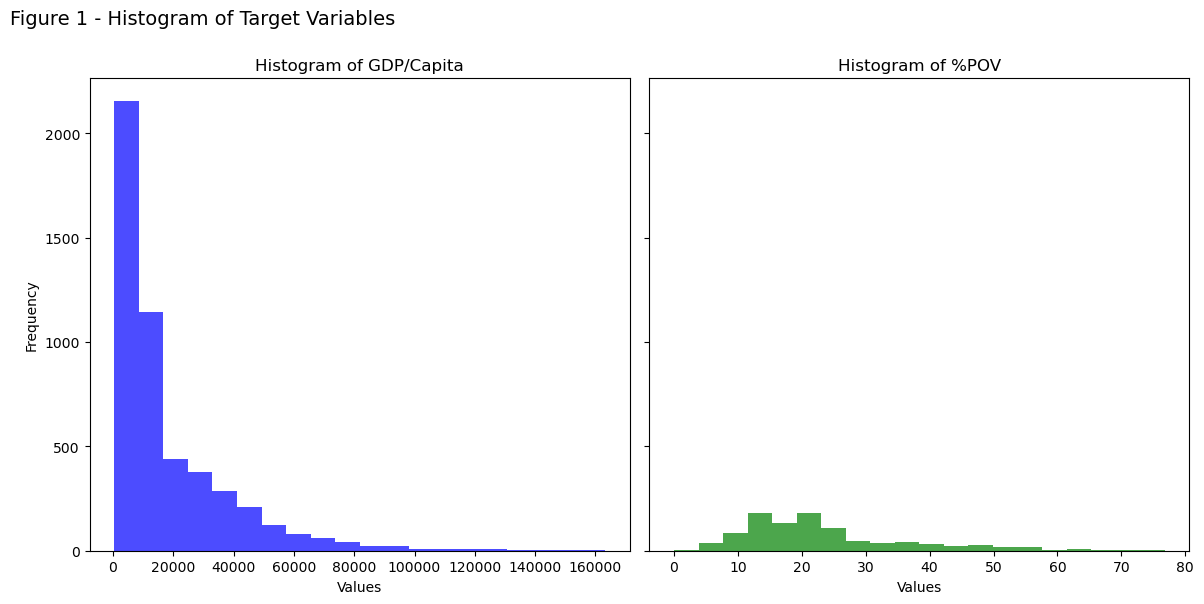

In [72]:
df_economy2 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/df_economy2.csv')

import seaborn as sns
import matplotlib.pyplot as plt

###### create a figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

####### plot histogram for GDP
ax[0].hist(df_economy2['gdp'], bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of GDP/Capita')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

####### plot histogram for %POV
ax[1].hist(df_economy2['%pov'], bins=20, color='green', alpha=0.7)
ax[1].set_title(f'Histogram of %POV')
ax[1].set_xlabel('Values')

fig.suptitle('Figure 1 - Histogram of Target Variables', x=0, y=1, ha='left', fontsize=14)

plt.tight_layout()
plt.show()

##### 2.3.1a - Graphical obsevations for target variables
Target variables are GDP per capita and % population at poverty line.  The first thing that is apparent is that the target variable for poverty has signifcantly less data than GDP. This can be seen by comparing the height of each graph (as they share the same y axis, which is frequency of data points per bin). The second observation is that GDP has a distribution shape that is significantly skewed to the right, while % poverty has a distribution shape that more bell shaped (follows normal distribution) but has a slightly longer tail to the right.

#### 2.3.2 Graphical Review of Feature Variables (CPIA Variables)

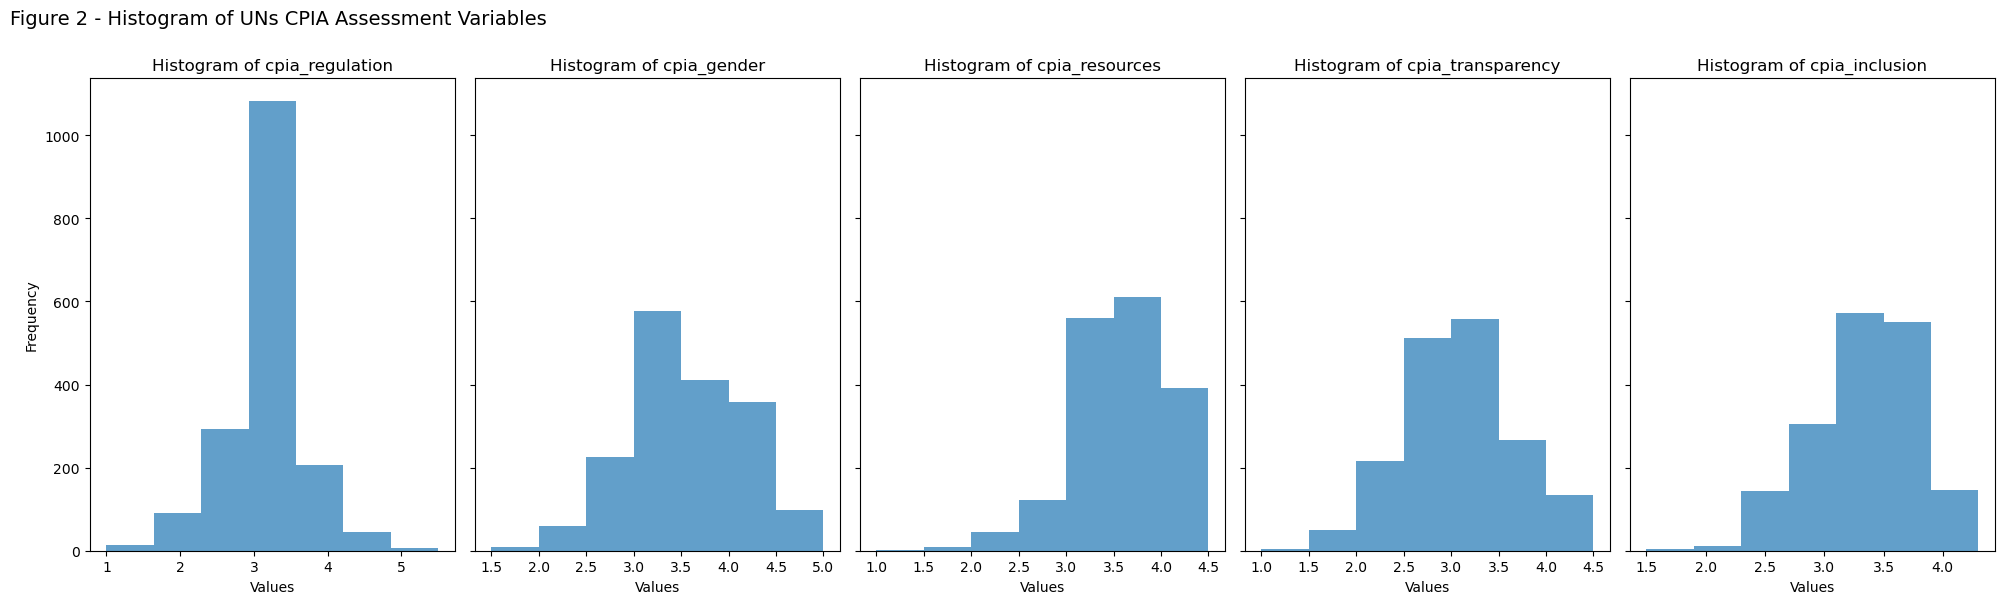

In [73]:
###### create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion']

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 2 - Histogram of UNs CPIA Assessment Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

##### 2.3.2a - Graphical observations for CPIA assessment variables
The first observation is that each of the five variables appear to be more normally distributed than not, although cpia_resourses is slightly skewed to the left. The second observation is that cpia_regulation significantly peaked in the center of the histogram

#### 2.3.3 Graphical Review of Feature Variables (Healthcare and Education)

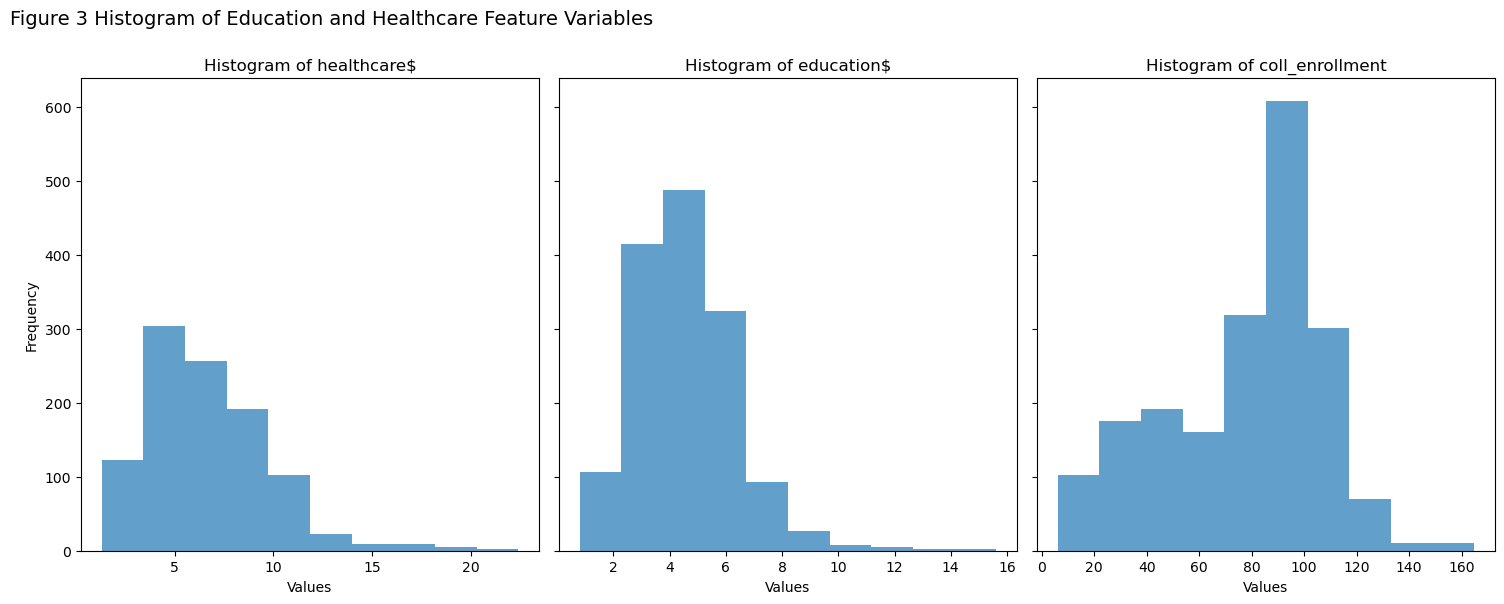

In [74]:
# create a column of variables you want to graph
cols = ['healthcare$', 'education$', 'coll_enrollment']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 3 Histogram of Education and Healthcare Feature Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

##### 2.3.3a - Graphical observations for education and healthcare related feature variables
The first observation is that the healthcare and education features are more normally distruted than not but are both slightly skewed to the right. The second observation is that coll_enrollment appears to be slightly bimodal (have two groupings of data within one) seen by the two peaks (or modes), but those groups overlap and are not significantly spread apart

#### 2.3.4 Graphical Review of Feature Variables (Income Distribution)

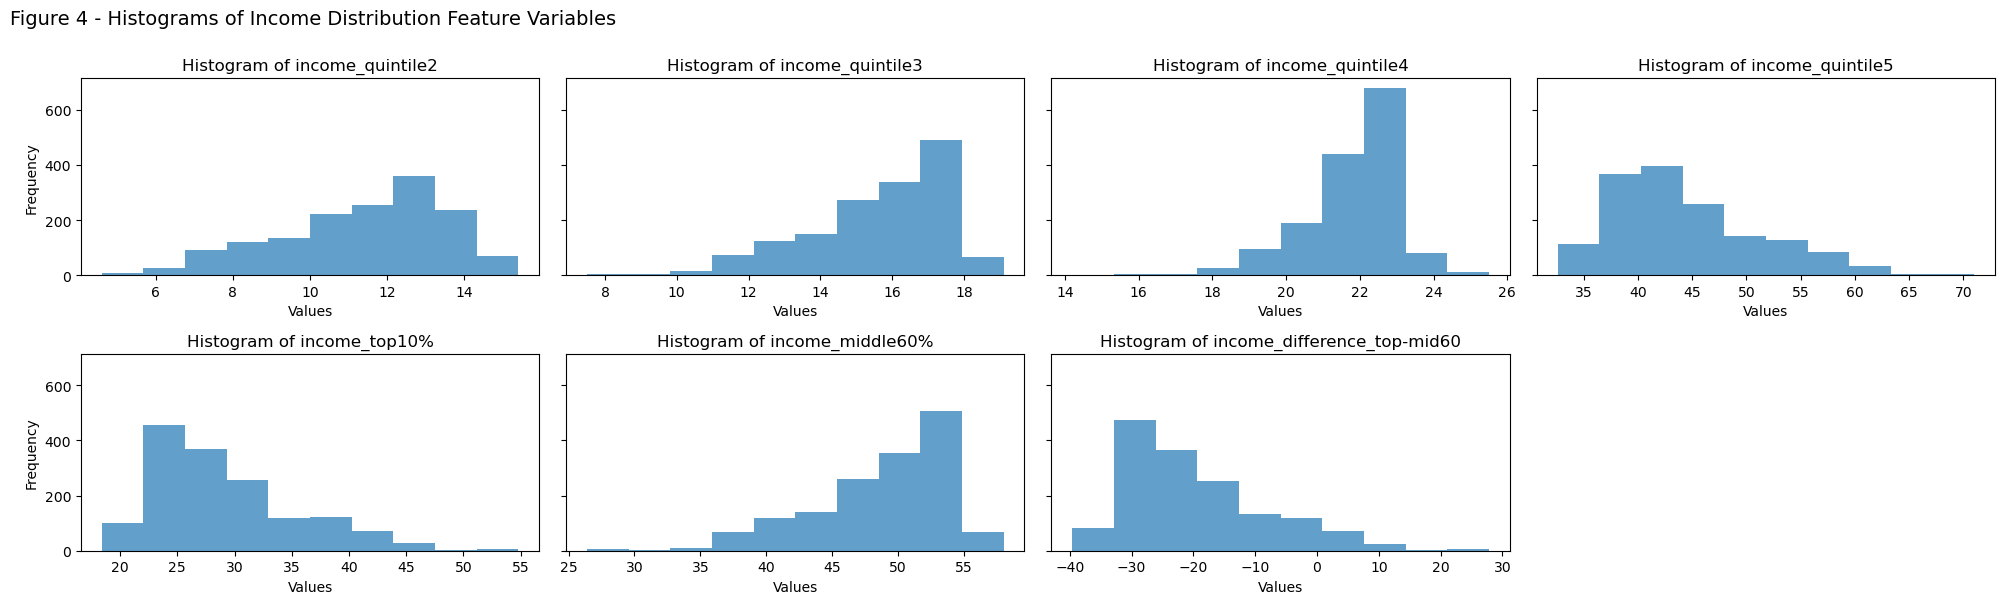

In [75]:
# create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60']

###### create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

####### Flatten the axes array for easy iteration
axes = axes.flatten()

######## plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
####### hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

########## Add a main title
fig.suptitle('Figure 4 - Histograms of Income Distribution Feature Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

##### 2.3.4a - Graphical observations for income related feature variables
The first observation is that quintiles 2, 3, 4 and middle60% are more skewed to the left than they are normally distributed. The second observation is that quintile 5, top10%, and income_difference are more skewed to the right than are normally distributed.

#### 2.3.5 Graphical Review of Feature Variables (Import and Export Value)

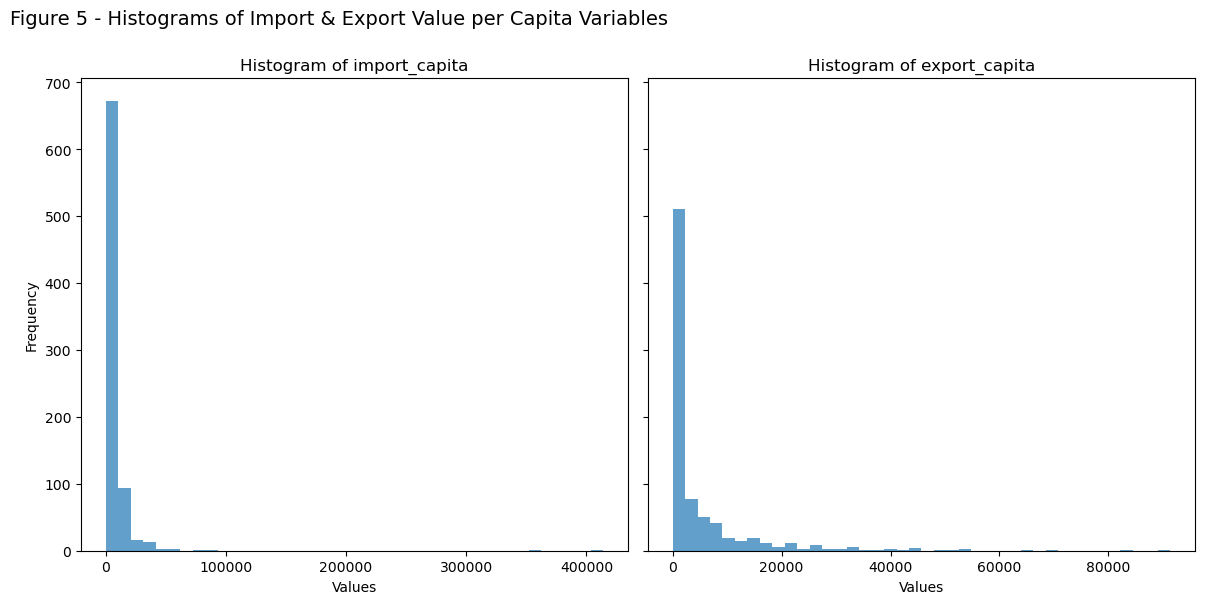

In [76]:
# create a column of variables you want to graph
cols = ['import_capita', 'export_capita']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 5 - Histograms of Import & Export Value per Capita Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

##### 2.3.5a - Graphical observations for Import and Export per capita
The main observation is that both import and export variables are significantly peaked and skewed to the right

#### 2.3.6 - Missing values
As mentioned above one the main reasons that data is reviewed analyzed graphically is to understand how missing data in your data set can be handled. The reason for this is that machine learning algorithms require that there be no missing data in the data set. There are a couple of approaches that one can take to deal with the problem
- only use those rows of data where there is no missing data
- impute the mean within those missing cells - can be used when the actual data is normally distributed
- impute the median (middle most data point in a dataset) within those missing cells - can be used when the actual data is skewed
- impute the mode (most frequently occuring category) - used for categorical data
- Extrapolating predicted points within missing data - can be used when there are known trends or relationships within the dataset

Below further exlores missing data in the master dataframe. Those rows that offer no feature information will be dropped, but the master dataframe's name will remain to df_economy2. Also, the number of missing cells for each variable is summarized

In [77]:
cols = df_economy2.loc[:, 'cpia_regulation':'export_capita']
feature_all_nan = cols.isna().all(axis=1).sum()
print(f'Number of rows where there was no feature information before drop : {feature_all_nan}')

Number of rows where there was no feature information before drop : 769


In [78]:
''' Check to see how many rows has only 1 feature with information'''
#### columns to check
cols = df_economy2.loc[:, 'cpia_regulation':'export_capita']

#### check rows where only 1 or 2 features has information
one_feature_with_info = cols.isna().sum(axis=1) == (cols.shape[1] - 1)
two_feature_with_info = cols.isna().sum(axis=1) == (cols.shape[1] - 2)

#### count the number of rows where the above condition is met (only one feature with information)
one_feature_count = one_feature_with_info.sum()
two_feature_count = two_feature_with_info.sum()

print(f'Number of rows with only one feature having information before drop : {one_feature_count}')
print(f'Number of rows with only two features having information before drop : {two_feature_count}')

Number of rows with only one feature having information before drop : 474
Number of rows with only two features having information before drop : 531


In [79]:
### Drop all rows that dont two or less features with information
df_economy2 = df_economy2[~cols.isna().all(axis=1)]   #### no features with info
df_economy2 = df_economy2[~one_feature_with_info]    #### one features
df_economy2 = df_economy2[~two_feature_with_info]    #### two features
cols2 = df_economy2.loc[:, 'cpia_regulation':'export_capita']

confirm_drop = cols2.isna().all(axis=1).sum()
print(f'Confirmation -- Number of rows where there two or less features with information after drop : {confirm_drop}')

Confirmation -- Number of rows where there two or less features with information after drop : 0


In [80]:
nan_counts = df_economy2.isna().sum()
print('Table 15 - Sum of missing values for each variable')
print(nan_counts)
print(f'Total rows in df_economy2 : {len(df_economy2)}')
#df_economy2.to_csv('df_economy2.csv', index=False)

Table 15 - Sum of missing values for each variable
area                              0
year                              0
gdp                               0
%pov                           2279
cpia_regulation                1492
cpia_gender                    1492
cpia_resources                 1492
cpia_transparency              1492
cpia_inclusion                 1497
healthcare$                    2324
education$                     2273
coll_enrollment                1983
income_quintile2               1698
income_quintile3               1698
income_quintile4               1698
income_quintile5               1698
income_top10%                  1698
income_middle60%               1698
income_difference_top-mid60    1698
import_capita                  2533
export_capita                  2533
dtype: int64
Total rows in df_economy2 : 3231


#### 2.3.6a - Missing Data Decisions
It should be noted above in Table 15 that after romoving all rows where two or less feature variables had data, a significant amount of information in the master dataframe is still is missing (~60%). As this is an initial review with data from and open source, the team determined to move forward with initial insights with the intention of exploring more data rich sources on the topic at a later date.

Below is the rationale and actions that will be taken to address missing data for each variable

- Target Variable __(gdp)__ - Has no missing variables not. ***No action taken***
- Target Variable __(%pov)__ - Has significantly less information than gdp, therefore ***Separation into its own dataset preserves the most information for this target variable***
- Feature __(cpia_regulation)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_gender)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_resources)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_transparency)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_inclusion)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(healthcare)__ - Figure 3 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(education)__ - Figure 3 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(coll_enrollment)__ - Figure 3 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(income related features)__ - Figure 4 shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***
- Feature __(import_capita)__ - Figure 5 shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***
- Feature __(Export_capita)__ - Figure 5 shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***

These aterations/transformation will be performed after the collinearity analysis for efficiency and complexity purposes

#### 2.3.7 Collinearity Analysis
Collinearity Analysis is important because feature variables that are correlated to one another brings in redundant information into the study and can obsure understanding of any meaningful relationships between cause and effect that may exsit. Below a color mapped matrix plot of correlation scores was created to determine where there may be significant collinearity

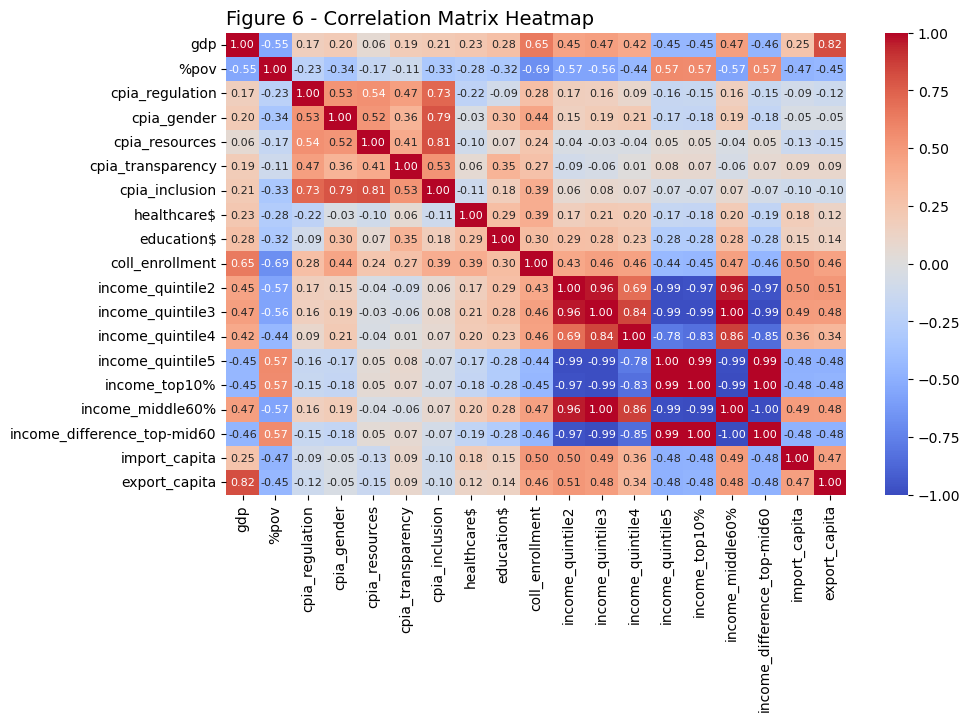

In [81]:
#### create a list of the variables to analyze
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment',
       'income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60', 'import_capita', 'export_capita']

#### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy2[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Figure 6 - Correlation Matrix Heatmap', x=0, y=1, ha='left', fontsize=14)
plt.show()

#### 2.3.7a Matrix plot observations
The first observation that stands out is that all of the income related variables show strong collinearity (correlated with one another). The second observation is that there is moderate colinearity between import, export, and coll_enrollment data. The third observation is that cpia_inclusion has a moderate to strong relationship with everyone of the other cpia variables. Other observations show little to no colinearity between the remaining feature variables. There does appear to be moderate correlation between some of the feature variables and the target variables but that is not a problem, as the purpose of the study is to find those potential relationships

##### 2.3.7b Drop Colinear Related Feature variables
It was decided that those income related variables which were strongly correlated be dropped with the exception of one variable 'income_middle60%'. Also cpia_inclusion would also be dropped. All other variables were kept in the master dataframe which will be updated to the name df_economy3.  A follow up collinearity matrix plot was created to determine if additional changes were needed

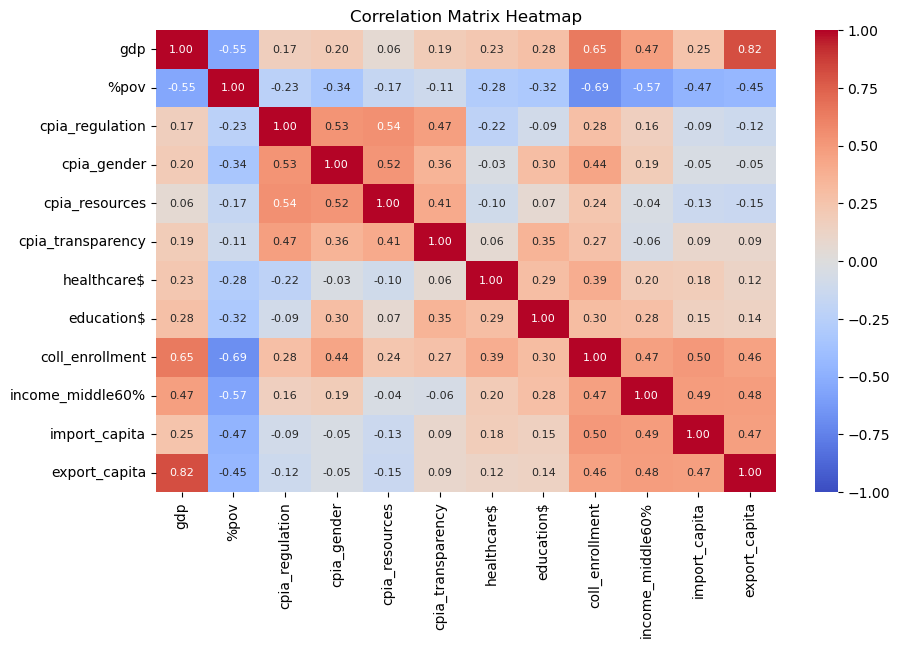

In [82]:
############## drop redundant variables
df_economy3 = df_economy2.drop(columns=['cpia_inclusion','income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_difference_top-mid60'])
#df_economy3


############### repeat updated correlation heatmap
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 
        'income_middle60%', 'import_capita', 'export_capita']

###### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy3[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 2.3.7c Follow up matrix plot observations after changes
Main observation is that there were no changes in colinearity after the above changes were made

#### 2.3.8 - Target varible separation and feature transformation
As mentioned above because there was significantly less data for the target variable %poverty. The team determined separate %poverty from gdp, to maintain the highest density of actual data for the target variable

In [84]:
### As disussed above separate gdp and pov tables
df_gdp = df_economy3[['area', 'year', 'gdp', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency','healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_capita', 'export_capita']]
df_pov = df_economy3[['area', 'year', '%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_capita', 'export_capita']]
len(df_gdp)
len(df_economy3)

3231

##### 2.3.8a - Impute missing data df_gdp data
Per the rationale above we will impute missing data for each of the feature variables within the df_gdp dataframe with either the variable's mean or median

In [85]:
from sklearn.impute import SimpleImputer
'''
Complete missing data imputation for gdp data
per the decisions made above in section xxx
'''
### Define features to be imputed with mean or median
mean_impute_cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment']
median_impute_cols = ['income_middle60%', 'import_capita', 'export_capita']

### Initiate imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

### Impute columns per imputation strategy
df_gdp[mean_impute_cols] = mean_imputer.fit_transform(df_gdp[mean_impute_cols])
df_gdp[median_impute_cols] = median_imputer.fit_transform(df_gdp[median_impute_cols])

### Confirm imputation eliminated nan
nan_count_gdp = df_gdp.isna().sum()
print('Table 16 - Confirmation all missing cells were imputed')
print(f'NaN Elimination Confirmation - Number of NaN records per variable : {nan_count_gdp}')
print(" ")
print('Table 17 - First five rows of the dataframe df_economy3 after imputation to address missing data')
print(df_gdp.head())
print(df_gdp.shape[0], 'Rows ,',df_gdp.shape[1], 'Columns')

Table 16 - Confirmation all missing cells were imputed
NaN Elimination Confirmation - Number of NaN records per variable : area                 0
year                 0
gdp                  0
cpia_regulation      0
cpia_gender          0
cpia_resources       0
cpia_transparency    0
healthcare$          0
education$           0
coll_enrollment      0
income_middle60%     0
import_capita        0
export_capita        0
dtype: int64
 
Table 17 - First five rows of the dataframe df_economy3 after imputation to address missing data
          area  year      gdp  cpia_regulation  cpia_gender  cpia_resources  \
4  Afghanistan  2006  1120.89              2.5          2.0             2.5   
5  Afghanistan  2007  1287.06              2.5          2.0             2.5   
6  Afghanistan  2008  1336.21              2.5          2.0             2.5   
7  Afghanistan  2009  1575.32              2.5          2.0             3.0   
8  Afghanistan  2010  1771.20              2.5          2.0            

##### 2.3.8b - Review and imputation of df_pov dataframe

In [86]:
'''
Repeat similar operations for the pov dataset in this order
1. eliminate all rows where pov has no information
2. eliminate all rows with no feature info to relate to pov data
3. impute remaining missing feature data
'''

### Eliminate rows without pov(target variable) data
df_pov = df_pov.dropna(subset=['%pov'])

### Verify count
nan_count_pov = df_pov.isna().sum()
#print('Table 18 - Summary of missing values for each variable in the df_poverty dataframe')
#print(f'Number of total rows in df_pov : {len(df_pov)}')
#print(f'Missing data : {nan_count_pov}')

### Drop all rows that dont have featue info
cols3 = df_pov.loc[:, 'cpia_regulation':'export_capita']
df_pov = df_pov[~cols3.isna().all(axis=1)]
confirm_drop3 = cols3.isna().all(axis=1).sum()
print('Table 18 - Summary of missing values for each variable in the df_poverty dataframe')
print(f'Number of total rows in df_pov : {len(df_pov)}')
print(f'Missing data : {nan_count_pov}')
print(f'Confirmation -- Number of rows where there was no feature information after drop : {confirm_drop3}')

Table 18 - Summary of missing values for each variable in the df_poverty dataframe
Number of total rows in df_pov : 952
Missing data : area                   0
year                   0
%pov                   0
cpia_regulation      751
cpia_gender          751
cpia_resources       751
cpia_transparency    751
healthcare$          655
education$           621
coll_enrollment      513
income_middle60%      76
import_capita        764
export_capita        764
dtype: int64
Confirmation -- Number of rows where there was no feature information after drop : 0


#### 2.3.8a - Observation for missing data on df_pov
After 

In [87]:
'''
Complete missing data imputation for pov data
per the decisions made above in section xxx
'''
### Define features to be imputed with mean or median
mean_impute_cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment']
median_impute_cols = ['income_middle60%', 'import_capita', 'export_capita']

### Initiate imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

### Impute columns per imputation strategy
df_pov[mean_impute_cols] = mean_imputer.fit_transform(df_pov[mean_impute_cols])
df_pov[median_impute_cols] = median_imputer.fit_transform(df_pov[median_impute_cols])

### Confirm imputation eliminated nan
nan_count_pov = df_pov.isna().sum()
print('Table 18 - Confirmation all missing cells were imputed for df_pov')
print(f'NaN Elimination Confirmation - Number of NaN records per variable : {nan_count_pov}')
print(" ")
print('Table 19 - First five rows of the dataframe df_pov after imputation to address missing data')
print(df_pov.head())
print(df_pov.shape[0], 'Rows ,',df_pov.shape[1], 'Columns')

Table 18 - Confirmation all missing cells were imputed for df_pov
NaN Elimination Confirmation - Number of NaN records per variable : area                 0
year                 0
%pov                 0
cpia_regulation      0
cpia_gender          0
cpia_resources       0
cpia_transparency    0
healthcare$          0
education$           0
coll_enrollment      0
income_middle60%     0
import_capita        0
export_capita        0
dtype: int64
 
Table 19 - First five rows of the dataframe df_pov after imputation to address missing data
           area  year  %pov  cpia_regulation  cpia_gender  cpia_resources  \
5   Afghanistan  2007  33.7         2.500000     2.000000        2.500000   
9   Afghanistan  2011  38.3         2.500000     2.000000        3.000000   
14  Afghanistan  2016  54.5         2.500000     1.500000        3.000000   
68      Albania  2002  25.4         3.343284     3.512438        3.564677   
71      Albania  2005  18.5         3.500000     4.000000        3.500000  

### 2.4 - Data preparation Summary
The purpose the data preparation stage is to clean, restructure, merge and transform all of the individual datasets into a single dataframe which can be effectively modelled with machine learning algorithms. The following is a summary of the signicant steps taken to create the master datatframes df_gdp, and df_pov:
1. For all individual uploaded dataframes complete the following steps
    a. Drop all dataframe footer and or header information
    b. Remove all whitespace characters
    c. Drop all non-informative columns
    d. Standardize and lower-case all column names
    e. Restructure all dataframes to a wide-form format, with target and feature variables aligned in adjacent columns, with the first two columns being 'area', 'year'(keys to merge on)
2. For Income related dataframes, merge each quintile dataframe into one, adjacently, on keys('area', 'year') and engineer the new features, 'income_middle60', and 'income_difference_top-mid60'
3. For Trade relaed dataframes, reformat individual dataframes from long-form to wide-form, merge individual dataframes, and engineer two new features import_capita, and export_capita
4. Merge all previously prepared dataframes into one, 'df_economy', on the columns 'area', and 'year'
5. Eliminate duplicate area names (b/c of naming convention differences) and align all feature data on standardized names
6. Drop all rows from the dataframe where area names where non geographical categories - revise dataframe name to 'df_economy2'
7. Drop all features from the dataframe where there was strong collinearity between features - revise dataframe name to 'df_economy3'
8. Split 'df_economy' master dataframe in to two. One for each target variable - 'df_gdp', 'df_pov'
9. Impute mean or median values into each feature variable's missing data cells based on the shape of their histogram

### 3 - Modelling

In [92]:
########### separate target variables from feature variables
df_gdp.reset_index(drop=True, inplace=True)
gdp = df_gdp[['gdp']]
features = df_gdp[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_capita', 'export_capita']]
print('Table 20 - First five rows to the gdp target dataframe')
print(gdp.head())
print(f'Number of rows in df : {len(gdp)}')
print('')
print('Table 21 - First five rows to the gdp features dataframe')
print(features.head())
print(f'Number of rows in df : {len(features)}')

Table 20 - First five rows to the gdp target dataframe
       gdp
0  1120.89
1  1287.06
2  1336.21
3  1575.32
4  1771.20
Number of rows in df : 3231

Table 21 - First five rows to the gdp features dataframe
   cpia_regulation  cpia_gender  cpia_resources  cpia_transparency  \
0              2.5          2.0             2.5                2.5   
1              2.5          2.0             2.5                2.0   
2              2.5          2.0             2.5                2.0   
3              2.5          2.0             3.0                2.0   
4              2.5          2.0             3.0                2.0   

   healthcare$  education$  coll_enrollment  income_middle60%  import_capita  \
0     6.667916    4.626913         29.93046              50.3    1515.856232   
1     6.667916    4.626913         30.08316              50.3    1515.856232   
2     6.667916    4.626913         40.22338              50.3    1515.856232   
3     6.667916    4.626913         46.73276         

#### <span style='color:blue;'>Figure XX.X</span>

##### Classification of target variable
- discuss article from investopedia [GDP Per Capita](https://www.investopedia.com/terms/p/per-capita-gdp.asp)
- discuss the percentile approash to classification

In [ ]:
########### get percentile values for gdp
gdp_percentile_33 = np.nanpercentile(gdp, 33)
gdp_percentile_50 = np.nanpercentile(gdp, 50)
gdp_percentile_67 = np.nanpercentile(gdp, 67)
print(f'The value in which 1/3 of gdp data falls below: {gdp_percentile_33}')
print(f'The value in which half of gdp data falls below:{gdp_percentile_50}')
print(f'The value in which 2/3 of gdp data falls below: {gdp_percentile_67}')

<span style='color:blue;'>Figure XX.X</span>

In [ ]:
'''
Based on the above the data for both gdp and %pov will
be split on the 1/3 and 2/3 percintiles for classification
'''
########### create classification criteria/conditions and associated class assingments for gdp
gdp_conditions = [
    gdp['gdp'] < 12000,
    gdp['gdp'] >=12000
]
gdp_choices = [0,1]  ########## class assignment

######### create a new column with gdp class values
gdp['gdp_class'] = np.select(gdp_conditions, gdp_choices, default=np.nan)

'''
For the purposes of simplicity and study comprehension y target
variables will be separate series y_gdp and y_pov
'''
y_gdp = gdp['gdp_class']
value_counts = gdp['gdp_class'].value_counts()
print(f'Value Counts per Class : {value_counts}')


<span style='color:blue;'>Figure XX.X</span>

# 3. Model
- Model Selection
- Training and testing
- Evaluation

### 3.1 Model Selection
- talk about the criteria of selecting the machine learning models [Model Selection Matrix]add link

### 3.2 Training and Testing
- talk about the process of training and testing what approach and techniques used

#### 3.2a LogLogistic
- overiview of the algorithm plus (pros/cons)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict

### Capture feature names before turing df into an array
feature_names = features.columns

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=0)

### Need to create a pipeline in order to combine polynomial features with logistic regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression())
])

### Define parameter grid for grid search
param_grid = {
    'log_reg__C': [100, 1000],
    'log_reg__solver': ['liblinear', 'saga'],
    'log_reg__penalty': ['l1', 'l2'],
    'poly__degree': [1]
}

### Initialize gridsearchcv with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

### Perform gridsearch
grid_search.fit(X_train, y_train)

### Display best paramaters and cross val score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation-score: {grid_search.best_score_}')

### Make predictions in order to get predictions for evaluations
y_test_pred = grid_search.best_estimator_.predict(X_test)
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display Summary Statistics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')
print(f'F1-score of the test set : {f1}')

#### <span style='color:blue;'>Figure XX.X</span>

In [ ]:
'''
Develop an importance_df and display importance of each feature
'''

best_model = grid_search.best_estimator_
coefficients = best_model.named_steps['log_reg'].coef_
poly_feature_names = best_model.named_steps['poly'].get_feature_names_out(input_features=feature_names)
coef_df = pd.DataFrame(coefficients, columns=poly_feature_names)
coef_df = coef_df.T
coef_df = coef_df.rename(columns={0: 'weight'})
coef_df['magnitude'] = coef_df['weight'].abs()
coef_df_sorted = coef_df.sort_values(by='magnitude', ascending=False)
coef_df_sorted.reset_index(inplace=True)
coef_df_sorted = coef_df_sorted.rename(columns={'index': 'Feature'})
sum_of_coef = coef_df_sorted['magnitude'].sum()
coef_df_sorted['Importance'] = coef_df_sorted['magnitude']/ sum_of_coef
coef_df_sorted = coef_df_sorted[~coef_df_sorted['Feature'].str.contains('1')]
coef_df_sorted = coef_df_sorted[['Feature', 'Importance']]

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Models Importance by Feature Name')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

#### 3.2b Decision Tree
- overiview of the algorithm plus (pros/cons)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=21)


### Initialize model
clf = DecisionTreeClassifier(random_state=21)

### setup parameter grid
param2 = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid = GridSearchCV(estimator=clf, param_grid=param2, cv=5, n_jobs=-1)

### Train the model
grid.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid.best_estimator_.predict(X_test)
y_test_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print(f'Best parameters: {grid.best_params_}')
print(f'Best cross-validation-score: {grid.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')
print(f'F1-score : {f1}')

#### <span style='color:blue;'>Figure XX.X</span>

#### Develop an importance_df and display importance of each feature

In [ ]:
### get best estimator
best_model = grid.best_params_

### Initialize the Decision Tree with best params
best_clf = DecisionTreeClassifier(**best_model, random_state=21)

### Train the model
best_clf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Models Importance by Feature Name')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

#### 3.2c Random Forest
- overiview of the algorithm plus (pros/cons)

In [ ]:
from sklearn.ensemble import RandomForestClassifier



### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=44)


### Initialize model
clf_rf = RandomForestClassifier(random_state=44)

### setup parameter grid
param3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid3 = GridSearchCV(estimator=clf_rf, param_grid=param3, cv=5, n_jobs=-1)

### Train the model
grid3.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid3.best_estimator_.predict(X_test)
y_test_pred_proba = grid3.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print(f'Best parameters: {grid3.best_params_}')
print(f'Best cross-validation-score: {grid3.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')
print(f'F1-score : {f1}')

In [ ]:
'''
Importance of each feature
'''
### get best estimator
best_model = grid3.best_params_

### Initialize the Decision Tree with best params
best_clf_rf = RandomForestClassifier(**best_model, random_state=21)

### Train the model
best_clf_rf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf_rf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_df2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)

### Creat a plot to show importance of each feature
plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forests Models Importance by Feature Name')

### Display plot of feature importance
plt.gca().invert_yaxis()
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

In [ ]:
'''
Merge the different importance dfs and calculate plot the average Rank
'''
### Calculate and add rank for ea models results
importance_df['Rank'] = importance_df['Importance'].rank(ascending=False)
importance_df2['Rank'] = importance_df2['Importance'].rank(ascending=False)
coef_df_sorted['Rank'] = coef_df_sorted['Importance'].rank(ascending=False)

### merge importance dfs in combined df
importance_combined = pd.merge(coef_df_sorted, importance_df, on='Feature', how='inner')
importance_combined = pd.merge(importance_combined, importance_df2, on='Feature', how='inner')

### Calculate average rank
importance_combined['Avg_Rank'] = (importance_combined['Rank_x'] + importance_combined['Rank_y'] + importance_combined['Rank'])/3
importance_combined = importance_combined.sort_values(by='Avg_Rank')

plt.figure(figsize=(10, 6))
plt.barh(importance_combined['Feature'], importance_combined['Avg_Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.ylabel('Feature')
plt.title('Average Rank of Importance Across Models')
plt.gca().invert_yaxis()
plt.axhline(y=5.5, color='black', linestyle='--')
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

### Model Evaluation

In [ ]:
scaler = MinMaxScaler()

critical_df = df_gdp[['gdp', 'coll_enrollment', 'income_middle60%', 'cpia_inclusion', 'import_capita', 'cpia_regulation', 'cpia_resources']]
not_scaled = ['gdp']
scaled = ['coll_enrollment', 'income_middle60%', 'cpia_inclusion', 'import_capita', 'cpia_regulation', 'cpia_resources']

critical_df2 = critical_df
critical_df2[scaled] = scaler.fit_transform(critical_df[scaled])

critical_df2 = pd.concat([critical_df[not_scaled], critical_df2[scaled]], axis=1)


sns.pairplot(critical_df)
plt.show()

# 5. Results
- Insights
- Reccomendations

# 6. Conclusion
- Recap
- Next Steps

# Appendix
- additional information visualizations, etc